## Homework 2

Extract meaningful relationships from a dataset using regression and gradient descent!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
coffee_code = pd.read_csv('coffee_and_code.csv')

In [3]:
coffee_code.head()

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,NaN
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29


### Visualize your data!

In [4]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='CodingHours', ylabel='CodingHours'>,
        <AxesSubplot:xlabel='CoffeeCupsPerDay', ylabel='CodingHours'>],
       [<AxesSubplot:xlabel='CodingHours', ylabel='CoffeeCupsPerDay'>,
        <AxesSubplot:xlabel='CoffeeCupsPerDay', ylabel='CoffeeCupsPerDay'>]],
      dtype=object)

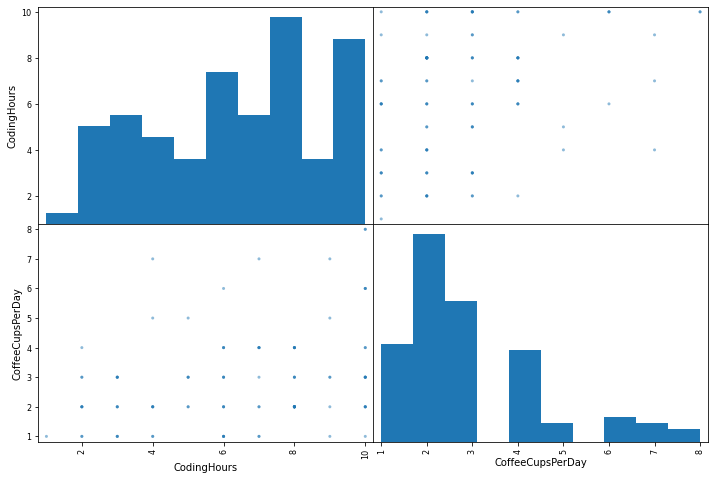

In [5]:
numericals = ['CodingHours', 'CoffeeCupsPerDay']
scatter_matrix(coffee_code[numericals], figsize=(12, 8))

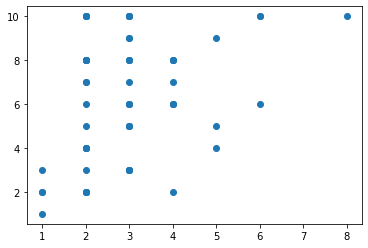

In [7]:
# include mask for coffee time

mask = (coffee_code['CoffeeTime']=="While coding")
plt.figure()
plt.scatter(coffee_code['CoffeeCupsPerDay'][mask],coffee_code['CodingHours'][mask])

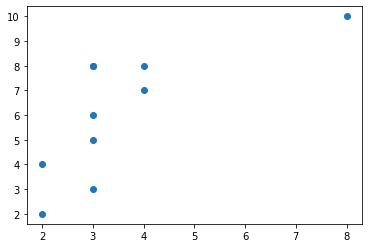

In [8]:
# include 2 masks for coffee time and coding without coffee

mask = (coffee_code['CoffeeTime']=="While coding") & (coffee_code['CodingWithoutCoffee']=="No")
plt.figure()
plt.scatter(coffee_code['CoffeeCupsPerDay'][mask],coffee_code['CodingHours'][mask])

### Perform a Regression!

In [9]:
# using linear regression, set coding hours as y variable
# and coffee cups per day as x variable

y = coffee_code['CodingHours'].array
x = coffee_code['CoffeeCupsPerDay'].array

In [10]:
# add dummy variable to each instance

x_b = np.c_[np.ones((100, 1)), x]

Find weights using $$\begin{equation*}w = (x^\intercal x)^{-1} x^\intercal y \end{equation*}$$

In [11]:
inv = np.linalg.inv

weight_best = inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [12]:
weight_best

array([4.92447341, 0.51402304])

In [13]:
# predict at the low and highs

x_new = np.array([[1], [8]])

# add dummy variables

x_new_b = np.c_[np.ones((2,1)), x_new]

In [14]:
# calculate prediction vector

y_pred = x_new_b.dot(weight_best)

In [15]:
print(y_pred)

[5.43849645 9.03665774]


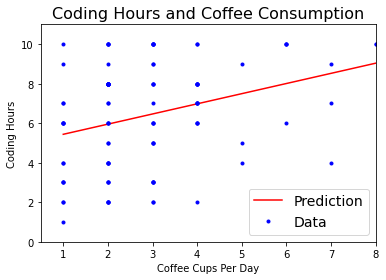

In [18]:
# visualize

plt.plot(x_new, y_pred, "-", color="r", label="Prediction")
plt.plot(coffee_code['CoffeeCupsPerDay'], 
         coffee_code['CodingHours'], ".", color="b", label="Data")


plt.title('Coding Hours and Coffee Consumption', fontsize=16)
plt.xlabel('Coffee Cups Per Day')
plt.ylabel('Coding Hours')

plt.legend(fontsize = 14, loc='best')
plt.axis([0.5, 8, 0, 11])


plt.show()

### Real Work Constraints!

We can put some constraints on the data included in our model to remove outliers, in order to reudce overfitting that may come with outliers in the data. For example, if the point with 1 cup of coffee and 10 coding hours is more than 3 standard deviations from the means, it may benefit the model to not include it. \
Having more specific labels may have fit the data better. Someone may code 10 hours and 1 cup of coffee and be as productive as someone who drank 4 cups and coded 5 hours, so having "LinesCoded" columns to quantify might make for a better dataset.